# Mounting The Drive

In [69]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# making the shortcut/ symbolic path

In [ ]:
import os

# Source directory
source_directory = '/content/drive/MyDrive/'

# Destination for the symbolic link
destination = '/mydrive'

# Create the symbolic link
os.symlink(source_directory, destination)


# Going inside the yolov4 folder

In [ ]:
%cd /mydrive/yolov4

/content/drive/MyDrive/yolov4


# Downloading the darknet folder inside yolov4 folder

In [ ]:
!git clone https://github.com/AlexeyAB/darknet

# Making changes in make file to use opencv and gpu

In [ ]:
%cd darknet/
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile
!sed -i 's/LIBSO=0/LIBSO=1/' Makefile


In [ ]:
!make

# checking cuda version

In [ ]:
!/usr/local/cuda/bin/nvcc --version

# Downloading Convulation layer pre trained weights 

In [ ]:
# !wget https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v3_optimal/yolov4.conv.137

!wget https://pjreddie.com/media/files/darknet53.conv.74

! mv darknet53.conv.74 /content/drive/MyDrive/yolov4/darknet/cfg/ #moving the downlaoded wright into cfg

In [ ]:
%cd darknet/

/content/drive/MyDrive/yolov4/darknet


In [ ]:
!chmod +x ./darknet #change permission to darknet folder

In [ ]:
# go to google drive . go to darknet folder. go to cfg. download yolov4-custom.cfg/or tiny or what you need. delete all other files from cfg from cfg folders

In [ ]:
"""

--> open the downloaded yolov4-custom.cfg

--> make some changes on that cgf file
change batch=1 and subdivision=16 or 32 according to gpu capacity

1) change max batches=6000 from max batches=500500(if you have 1 class or 2 class or 3 class then max batches would be 6000)
formula=no of classes * 2000( for class more than 3)

2) for steps = first value(80% of maxbatches), second value(90% of maxbatches)

3) In the convolutional before each [yolo] layerchange filters  (no of classes + 5)x3

4) In the yolo layer change classes= (according to your need)

after changes upload it to googledrive where yolov4,darknet,cfg
"""

In [ ]:
"""

--> go to yolov4 in google drive

--> go to data darknet f0lder. inside darknet folder go to data.

--> delete everything from data except labels folder

--> upload the folder having all the images with annotation prepared

"""

In [ ]:
"""

--> my images folder name is multiple_images which i have uploaded in data inside darknet folder

--> now we have to make multiple_images.names (mask is my folder having all images so) imageshavingfoldername.names

--> now we have to make mmultiple_images.data (mask is my folder having all images so) imageshavingfoldername.data

--------------------------------------------------------------------------------------------------------------------------------------
1)mask.names file have all the class names in spertate line
example-
|---------------------------|
|Mask                       |
|No Mask                    |
|                           |
|                           |
|---------------------------|


2)mask.data file have following information
|-----------------------------------------------------------------------------------------------------|
|classes=2                                                                                            |
|train  = data/train.txt                                                                              |
|valid  = data/test.txt                                                                               |
|names = data/multiple_images.names                                                                              |
|backup = backup/                                                                                     |
|                                                                                                     |
|                                                                                                     |
|                                                                                                     |
|-----------------------------------------------------------------------------------------------------|



now open vscode and make this two file and upload it in data folder which is in darknet folder
"""

In [ ]:
# In backup folder of darknet all the weights are stored which is trained

In [1]:
# #run this code in jupyternotebook or vscode and genetare the train and text txt


# import os
# import random

# # Path to the folder containing images
# image_folder_path = r'C:\Users\miraj\OneDrive\Desktop\yolodemo\mask' # image folder location outside drive and google colab

# # Get a list of image filenames (filter out .txt files)
# image_filenames = [filename for filename in os.listdir(image_folder_path) if filename.endswith(('.jpg', '.jpeg', '.png'))]

# # Shuffle the filenames to randomize the order
# random.shuffle(image_filenames)

# # Calculate the split indices for train and test sets
# split_index = int(0.9 * len(image_filenames))
# train_filenames = image_filenames[:split_index]
# test_filenames = image_filenames[split_index:]

# # Write the file paths to train.txt inside the data folder
# with open(r'C:\Users\miraj\OneDrive\Desktop\yolodemo\train.txt', 'w') as train_file: # location of my computer folder
#     for filename in train_filenames:
#         train_file.write(f'data/mask/{filename}\n')

# # Write the file paths to test.txt inside the data folder
# with open(r'C:\Users\miraj\OneDrive\Desktop\yolodemo\test.txt', 'w') as test_file:
#     for filename in test_filenames:
#         test_file.write(f'data/mask/{filename}\n')

# print('train.txt and test.txt created successfully in the data folder.')


# # upload train.txt and test.txt in the data folder of darknet
     

# Training the model

In [ ]:
! ./darknet detector train data/multiple_images.data cfg/yolov4-tiny.cfg  /content/drive/MyDrive/yolov4/darknet/cfg/darknet53.conv.74 -dont_show -map

Streaming output truncated to the last 5000 lines.
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 30 Avg (IOU: 0.703177), count: 2, class_loss = 0.999697, iou_loss = 0.241958, total_loss = 1.241656 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 37 Avg (IOU: 0.000000), count: 1, class_loss = 0.000000, iou_loss = 0.000000, total_loss = 0.000000 
 total_bbox = 113702, rewritten_bbox = 0.000000 % 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 30 Avg (IOU: 0.876995), count: 1, class_loss = 0.001164, iou_loss = 0.234418, total_loss = 0.235583 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 37 Avg (IOU: 0.000000), count: 1, class_loss = 0.000000, iou_loss = 0.000000, total_loss = 0.000000 
 total_bbox = 113703, rewritten_bbox = 0.000000 % 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 30 Avg (IOU: 0.858014), count: 1, class_loss = 0.001055, iou_loss = 0.224408, total_loss = 0.225463 
v3 (iou

# Making changes in cfg file for test

%cd cfg
!sed -i 's/batch=64/batch=1/' yolov4-tiny.cfg
sed -i 's/subdivisions=16/subdivisions=1/' yolov4-tiny.cfg
%cd ..

# Function to display test image

In [ ]:
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# use this to upload files
def upload():
  from google.colab import files
  uploaded = files.upload()
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

# use this to download a file
def download(path):
  from google.colab import files
  files.download(path)

# Testing the image

In [ ]:
!./darknet detector test data/multiple_images.data cfg/yolov4-tiny.cfg /content/drive/MyDrive/yolov4/darknet/backup/yolov4-tiny_best.weights /content/drive/MyDrive/yolov4/671masked.jpg -thresh 0.3


 CUDA-version: 11080 (12000), cuDNN: 8.9.0, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 4.5.4
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 2    416 x 416 x   3 ->  208 x 208 x  32 0.075 BF
   1 conv     64       3 x 3/ 2    208 x 208 x  32 ->  104 x 104 x  64 0.399 BF
   2 conv     64       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x  64 0.797 BF
   3 route  2 		                       1/2 ->  104 x 104 x  32 
   4 conv     32       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  32 0.199 BF
   5 conv     32       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  32 0.199 BF
   6 route  5 4 	                           ->  104 x 104 x  64 
   7 conv     64       1 x 1/ 1    104 x 104 x  64 ->  104 x 104 x  64 0.089 BF
   8 route  2 7 	     

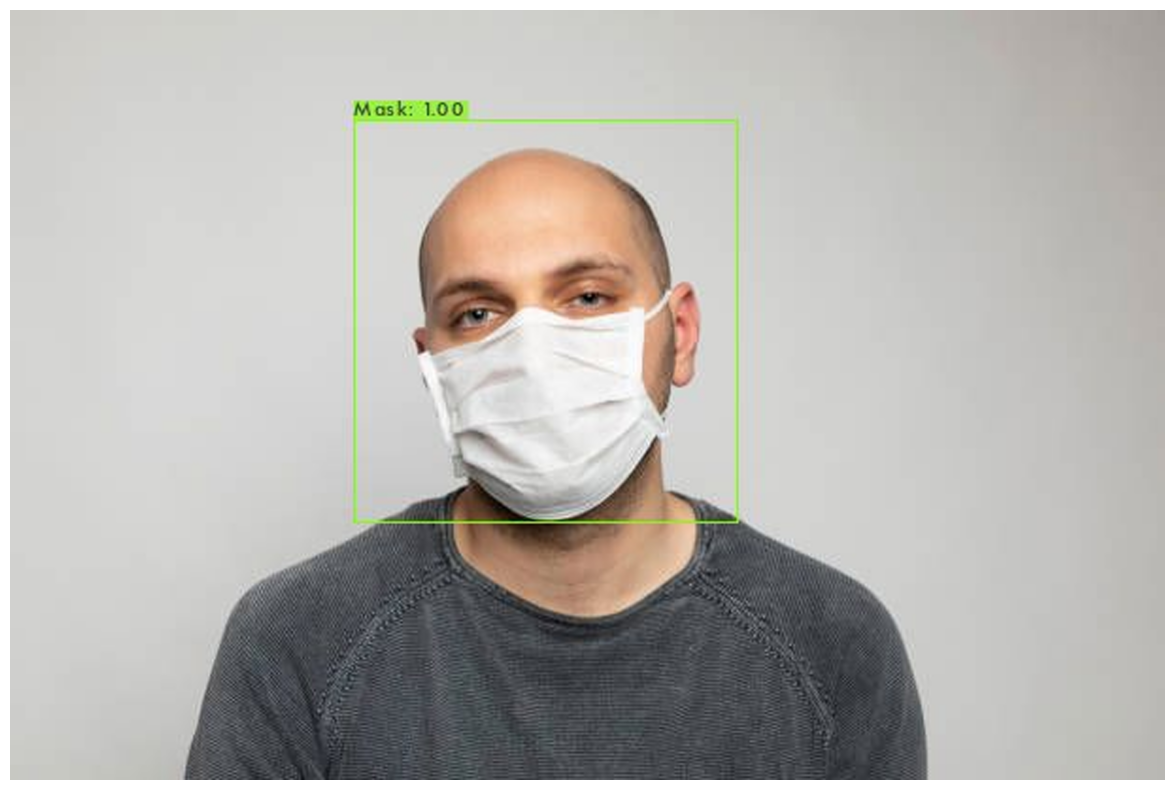

In [ ]:
imShow('predictions.jpg')

# Showing the Performance Plot

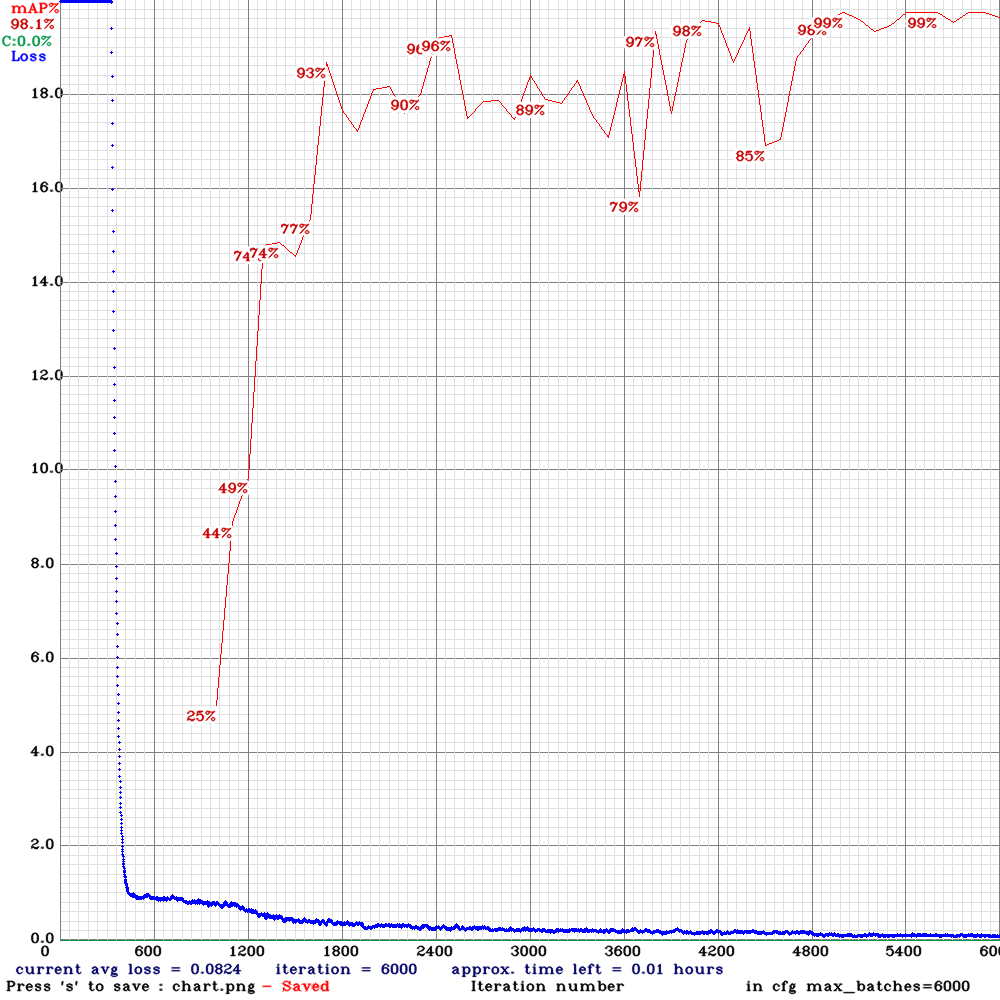

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

# Load the image
image = cv2.imread('/content/drive/MyDrive/yolov4/darknet/chart.png')

# Check if the image was loaded successfully
if image is None:
    print('Could not open or read the image.')
    exit()

# Display the image
cv2_imshow(image)


# Testing for the other images

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
%cd /content/drive/MyDrive/yolov4/darknet

/content/drive/MyDrive/yolov4/darknet


In [6]:
!chmod +x ./darknet

In [24]:
!./darknet detector test data/multiple_images.data cfg/yolov4-tiny.cfg /content/drive/MyDrive/yolov4/darknet/backup/yolov4-tiny_best.weights /content/drive/MyDrive/yolov4/36.jpg -thresh 0.3


 CUDA-version: 11080 (12000), cuDNN: 8.9.0, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 4.5.4
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 2    416 x 416 x   3 ->  208 x 208 x  32 0.075 BF
   1 conv     64       3 x 3/ 2    208 x 208 x  32 ->  104 x 104 x  64 0.399 BF
   2 conv     64       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x  64 0.797 BF
   3 route  2 		                       1/2 ->  104 x 104 x  32 
   4 conv     32       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  32 0.199 BF
   5 conv     32       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  32 0.199 BF
   6 route  5 4 	                           ->  104 x 104 x  64 
   7 conv     64       1 x 1/ 1    104 x 104 x  64 ->  104 x 104 x  64 0.089 BF
   8 route  2 7 	     

In [25]:
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# use this to upload files
def upload():
  from google.colab import files
  uploaded = files.upload()
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

# use this to download a file
def download(path):
  from google.colab import files
  files.download(path)

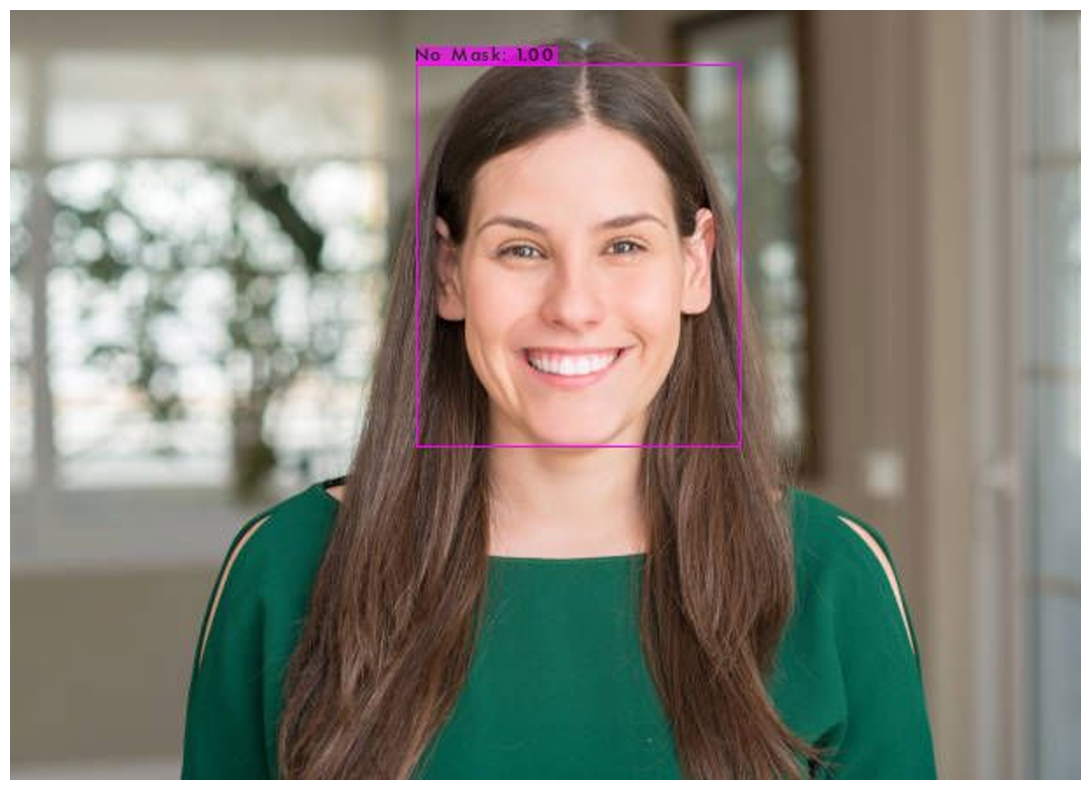

In [26]:
imShow('predictions.jpg')

In [27]:
!./darknet detector test data/multiple_images.data cfg/yolov4-tiny.cfg /content/drive/MyDrive/yolov4/darknet/backup/yolov4-tiny_best.weights /content/drive/MyDrive/yolov4/face-mask-study.jpg -thresh 0.3


 CUDA-version: 11080 (12000), cuDNN: 8.9.0, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 4.5.4
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 2    416 x 416 x   3 ->  208 x 208 x  32 0.075 BF
   1 conv     64       3 x 3/ 2    208 x 208 x  32 ->  104 x 104 x  64 0.399 BF
   2 conv     64       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x  64 0.797 BF
   3 route  2 		                       1/2 ->  104 x 104 x  32 
   4 conv     32       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  32 0.199 BF
   5 conv     32       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  32 0.199 BF
   6 route  5 4 	                           ->  104 x 104 x  64 
   7 conv     64       1 x 1/ 1    104 x 104 x  64 ->  104 x 104 x  64 0.089 BF
   8 route  2 7 	     

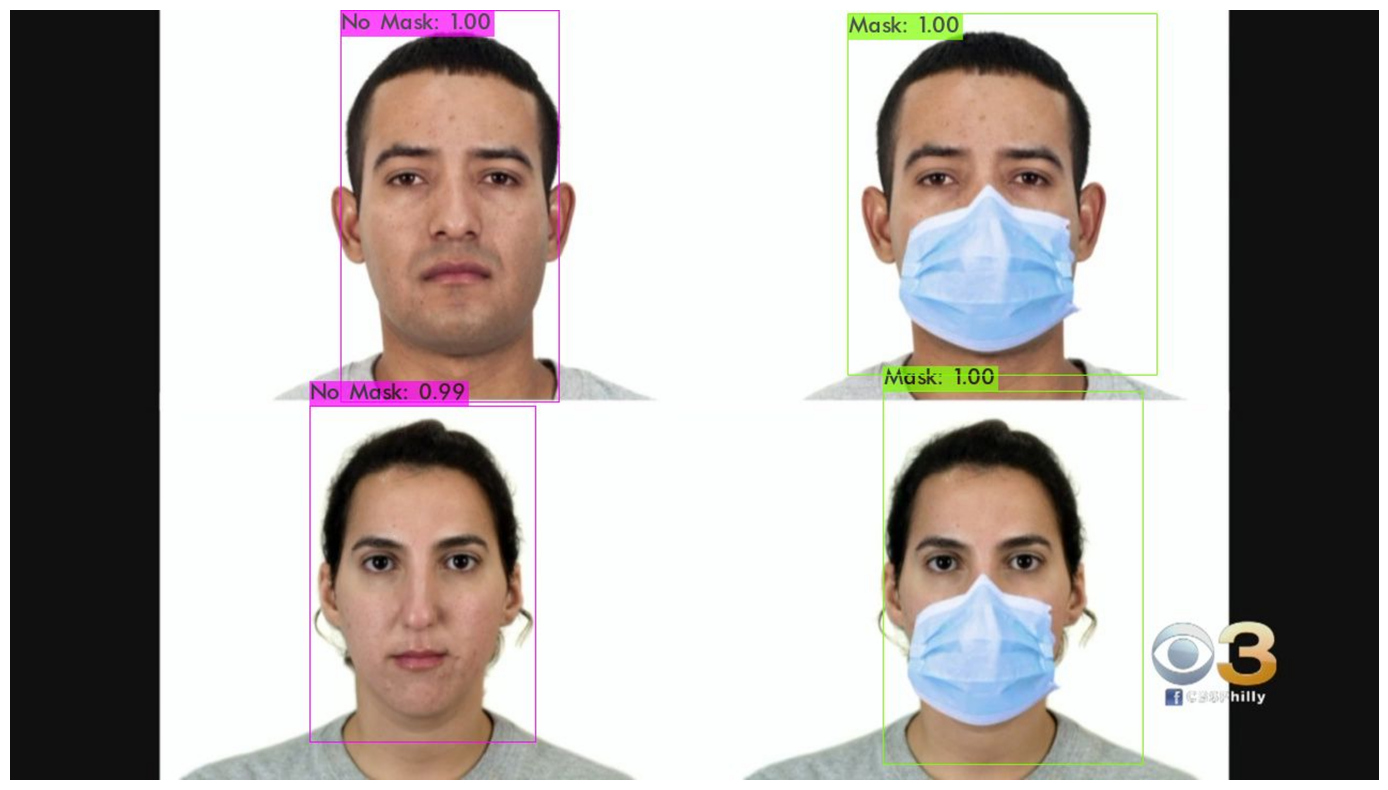

In [28]:
imShow('predictions.jpg')

In [29]:
!./darknet detector test data/multiple_images.data cfg/yolov4-tiny.cfg /content/drive/MyDrive/yolov4/darknet/backup/yolov4-tiny_best.weights /content/drive/MyDrive/yolov4/hh.jpg -thresh 0.3


 CUDA-version: 11080 (12000), cuDNN: 8.9.0, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 4.5.4
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 2    416 x 416 x   3 ->  208 x 208 x  32 0.075 BF
   1 conv     64       3 x 3/ 2    208 x 208 x  32 ->  104 x 104 x  64 0.399 BF
   2 conv     64       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x  64 0.797 BF
   3 route  2 		                       1/2 ->  104 x 104 x  32 
   4 conv     32       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  32 0.199 BF
   5 conv     32       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  32 0.199 BF
   6 route  5 4 	                           ->  104 x 104 x  64 
   7 conv     64       1 x 1/ 1    104 x 104 x  64 ->  104 x 104 x  64 0.089 BF
   8 route  2 7 	     

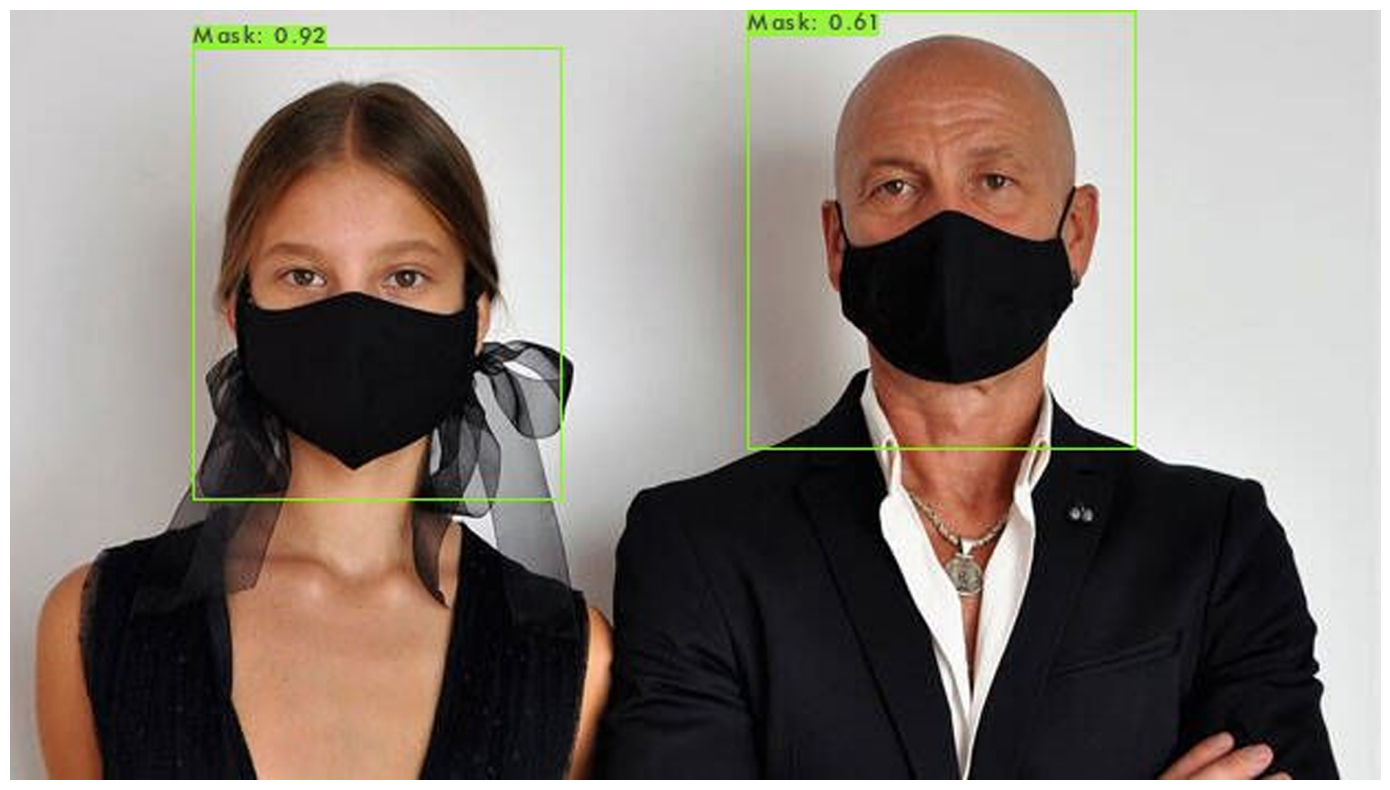

In [30]:
imShow('predictions.jpg')

In [40]:
!./darknet detector test data/multiple_images.data cfg/yolov4-tiny.cfg /content/drive/MyDrive/yolov4/darknet/backup/yolov4-tiny_best.weights /content/drive/MyDrive/yolov4/real.jpg -thresh 0.9


 CUDA-version: 11080 (12000), cuDNN: 8.9.0, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 4.5.4
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 2    416 x 416 x   3 ->  208 x 208 x  32 0.075 BF
   1 conv     64       3 x 3/ 2    208 x 208 x  32 ->  104 x 104 x  64 0.399 BF
   2 conv     64       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x  64 0.797 BF
   3 route  2 		                       1/2 ->  104 x 104 x  32 
   4 conv     32       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  32 0.199 BF
   5 conv     32       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  32 0.199 BF
   6 route  5 4 	                           ->  104 x 104 x  64 
   7 conv     64       1 x 1/ 1    104 x 104 x  64 ->  104 x 104 x  64 0.089 BF
   8 route  2 7 	     

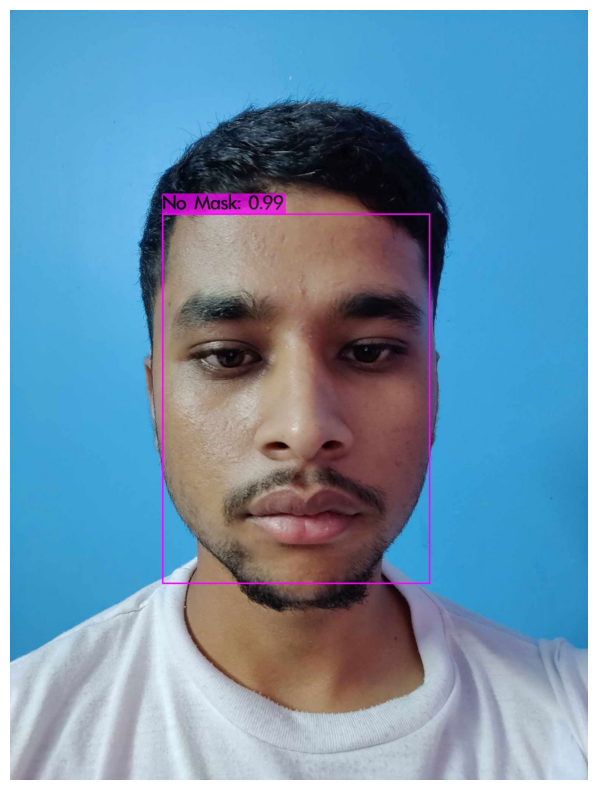

In [41]:
imShow('predictions.jpg')

In [42]:
!./darknet detector test data/multiple_images.data cfg/yolov4-tiny.cfg /content/drive/MyDrive/yolov4/darknet/backup/yolov4-tiny_best.weights /content/drive/MyDrive/yolov4/m1.jpg -thresh 0.9


 CUDA-version: 11080 (12000), cuDNN: 8.9.0, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 4.5.4
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 2    416 x 416 x   3 ->  208 x 208 x  32 0.075 BF
   1 conv     64       3 x 3/ 2    208 x 208 x  32 ->  104 x 104 x  64 0.399 BF
   2 conv     64       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x  64 0.797 BF
   3 route  2 		                       1/2 ->  104 x 104 x  32 
   4 conv     32       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  32 0.199 BF
   5 conv     32       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  32 0.199 BF
   6 route  5 4 	                           ->  104 x 104 x  64 
   7 conv     64       1 x 1/ 1    104 x 104 x  64 ->  104 x 104 x  64 0.089 BF
   8 route  2 7 	     

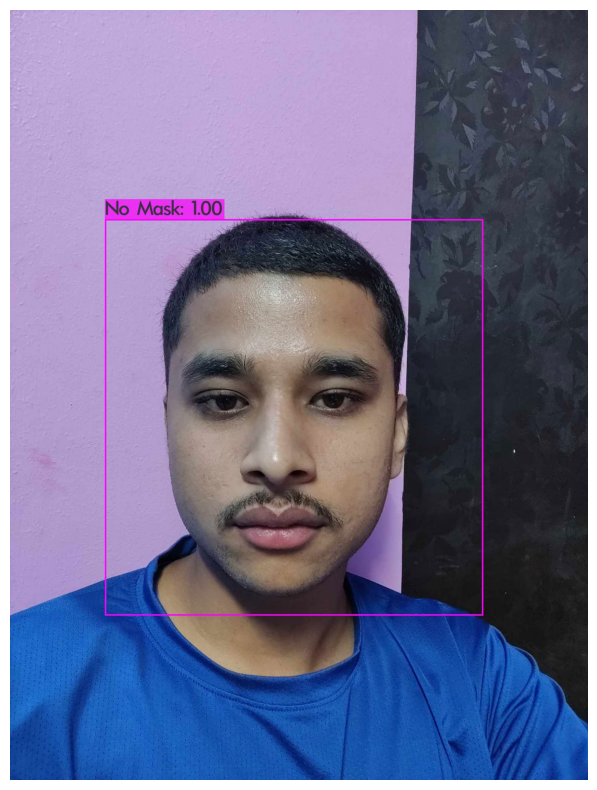

In [43]:
imShow('predictions.jpg')

In [44]:
!./darknet detector test data/multiple_images.data cfg/yolov4-tiny.cfg /content/drive/MyDrive/yolov4/darknet/backup/yolov4-tiny_best.weights /content/drive/MyDrive/yolov4/m2.jpg -thresh 0.9


 CUDA-version: 11080 (12000), cuDNN: 8.9.0, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 4.5.4
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 2    416 x 416 x   3 ->  208 x 208 x  32 0.075 BF
   1 conv     64       3 x 3/ 2    208 x 208 x  32 ->  104 x 104 x  64 0.399 BF
   2 conv     64       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x  64 0.797 BF
   3 route  2 		                       1/2 ->  104 x 104 x  32 
   4 conv     32       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  32 0.199 BF
   5 conv     32       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  32 0.199 BF
   6 route  5 4 	                           ->  104 x 104 x  64 
   7 conv     64       1 x 1/ 1    104 x 104 x  64 ->  104 x 104 x  64 0.089 BF
   8 route  2 7 	     

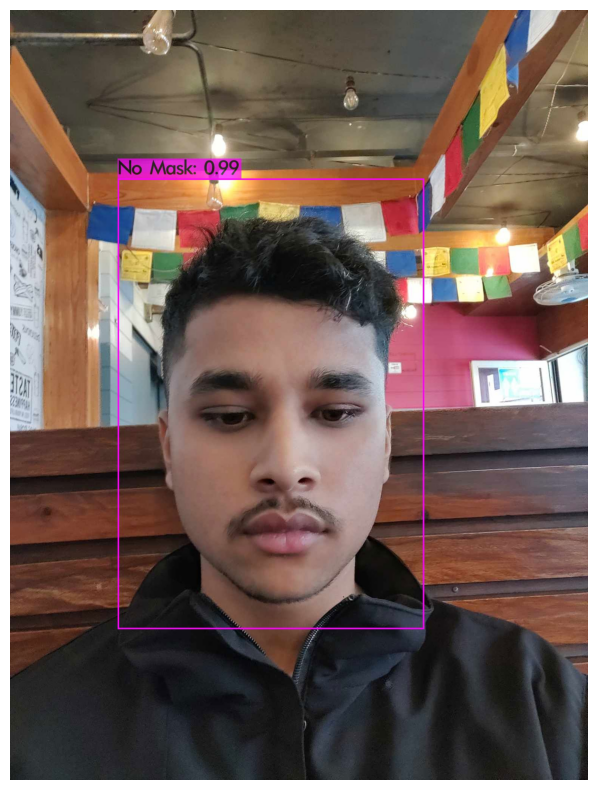

In [45]:
imShow('predictions.jpg')

In [53]:
!./darknet detector test data/multiple_images.data cfg/yolov4-tiny.cfg /content/drive/MyDrive/yolov4/darknet/backup/yolov4-tiny_best.weights /content/drive/MyDrive/yolov4/l1.jpg -thresh 0.9


 CUDA-version: 11080 (12000), cuDNN: 8.9.0, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 4.5.4
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 2    416 x 416 x   3 ->  208 x 208 x  32 0.075 BF
   1 conv     64       3 x 3/ 2    208 x 208 x  32 ->  104 x 104 x  64 0.399 BF
   2 conv     64       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x  64 0.797 BF
   3 route  2 		                       1/2 ->  104 x 104 x  32 
   4 conv     32       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  32 0.199 BF
   5 conv     32       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  32 0.199 BF
   6 route  5 4 	                           ->  104 x 104 x  64 
   7 conv     64       1 x 1/ 1    104 x 104 x  64 ->  104 x 104 x  64 0.089 BF
   8 route  2 7 	     

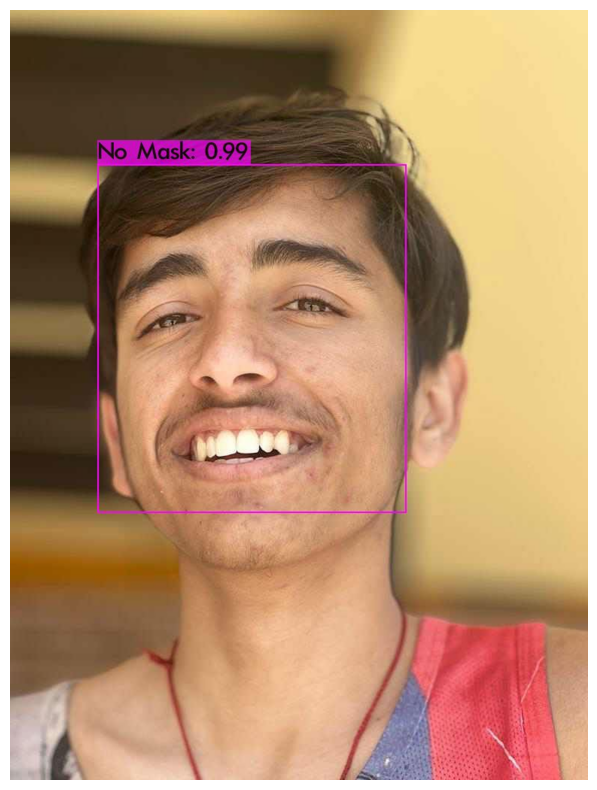

In [54]:
imShow('predictions.jpg')